In [1]:
# Importamos las librerías

import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRFClassifier
from sklearn.metrics import precision_score, accuracy_score, confusion_matrix
import numpy as np
import seaborn as sns
import pickle


In [2]:
# Cargamos y limpiamos los datos

df = pd.read_csv('../data/raw/water_potability.csv')
df.dropna(inplace=True)
df = shuffle(df)

In [3]:
# Nombramos el target y las features

X = df.drop('Potability', axis=1)
y = df['Potability']

In [4]:
# Hacemos el split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=12)


In [5]:
# Construimos los modelos

clf = GaussianNB()

random_forest = RandomForestClassifier(max_depth=3, max_features = 'sqrt', n_estimators = 600)

xgb = XGBRFClassifier(learning_rate = 0.0001, max_depth=7, n_estimators=300)


In [6]:
# Entrenamos los modelos

modelos = {"clf": clf,
        "rand_forest": random_forest,
        "xgb": xgb}

for name, modelo in modelos.items():
    modelo.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:47:07] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [7]:
# Evaluamos los modelos y los clasificamos

scores = [(i, precision_score(y_test,j.predict(X_test))) for i, j in modelos.items()]

scores = pd.DataFrame(scores, columns=["Model", "Score"]).sort_values(by="Score", ascending=False)
scores


,Model,Score
1,rand_forest,0.857143
2,xgb,0.813953
0,clf,0.684211


Acierto: 58.56 %
Error: 41.44 %
[[224   2]
 [165  12]]


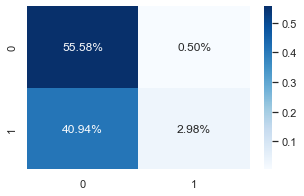

In [8]:
# evaluamos el modelo final

acierto = accuracy_score(y_test, random_forest.predict(X_test))
error = 1 - acierto

print("Acierto:", round(acierto*100, 2), "%")
print("Error:", round(error*100, 2), "%")

c_matrix = confusion_matrix(y_test, random_forest.predict(X_test))
print(c_matrix)

sns.set(rc = {'figure.figsize':(5,3)})
sns.heatmap(c_matrix/np.sum(c_matrix), annot=True, 
            fmt='.2%', cmap='Blues');

In [9]:
# guardamos el nuevo modelo elegido

filename = '../model/final/best_model'

with open(filename, 'wb') as archivo_salida:
    pickle.dump(random_forest, archivo_salida) 